In [1]:
!pip install transformers datasets torch scikit-learn

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving shakespeare-sentiment.csv to shakespeare-sentiment.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_sent_emo.csv to test_sent_emo.csv


In [5]:
# Load the datasets
shakespeare_df = pd.read_csv('shakespeare-sentiment.csv')
test_sent_emo_df = pd.read_csv('test_sent_emo.csv')

In [6]:
# Map sentiment labels to numeric values
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}

In [7]:
# Apply the mapping to both datasets
shakespeare_df['sentiment'] = shakespeare_df['sentiment'].map(label_mapping)
test_sent_emo_df['Sentiment'] = test_sent_emo_df['Sentiment'].map(label_mapping)

In [8]:
# Remove rows with missing labels in both datasets
shakespeare_df = shakespeare_df.dropna(subset=['sentiment'])
test_sent_emo_df = test_sent_emo_df.dropna(subset=['Sentiment'])

# Verify the mapping and check if it's done correctly
print("Shakespeare Sentiment unique values after mapping:", shakespeare_df['sentiment'].unique())
print("test_sent_emo Sentiment unique values after mapping:", test_sent_emo_df['Sentiment'].unique())

Shakespeare Sentiment unique values after mapping: []
test_sent_emo Sentiment unique values after mapping: [0 2 1]


In [9]:
# Load the Shakespeare Sentiment Dataset
shakespeare_sentiment = pd.read_csv('shakespeare-sentiment.csv')

# Step 1: Preprocess Shakespeare Sentiment Dataset
# Remove rows with missing values in the 'sentiment' column
shakespeare_sentiment_clean = shakespeare_sentiment.dropna(subset=['sentiment'])

# Map string labels to numeric values (POSITIVE=0, NEUTRAL=1, NEGATIVE=2)
label_mapping = {"POSITIVE": 0, "NEUTRAL": 1, "NEGATIVE": 2}

# Apply the mapping to the 'sentiment' column
shakespeare_sentiment_clean['sentiment'] = shakespeare_sentiment_clean['sentiment'].map(label_mapping)

# Verify the mapping and check the unique values
print("Shakespeare Sentiment unique values after mapping:", shakespeare_sentiment_clean['sentiment'].unique())

# Check the first few rows to verify the data
print(shakespeare_sentiment_clean[['text', 'sentiment']].head())

Shakespeare Sentiment unique values after mapping: [0 1 2]
                                                text  sentiment
0  With no fees or minimums, banking with Capital...          0
1  And with no overdraft fees, is it even a decis...          1
2                       What's in your wallet terms?          1
3                                             Apply.          1
4  See capitalone.com Slash Bank Capital one NA m...          0


In [10]:
from transformers import AlbertTokenizer
import torch

# Initialize the ALBERT tokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize the datasets
def tokenize_data(texts, labels):
    encodings = tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
    encodings['labels'] = torch.tensor(labels.values)
    return encodings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split

# Step 1: Split the Shakespeare dataset
X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(shakespeare_sentiment_clean['text'], shakespeare_sentiment_clean['sentiment'], test_size=0.2, random_state=42)

# Step 2: Split the temp set into validation and test sets
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_temp_s, y_temp_s, test_size=0.5, random_state=42)

# Tokenize the Shakespeare dataset
train_encodings_s = tokenize_data(X_train_s, y_train_s)
val_encodings_s = tokenize_data(X_val_s, y_val_s)
test_encodings_s = tokenize_data(X_test_s, y_test_s)

In [12]:
# Step 1: Split the test_sent_emo dataset
X_train_e, X_temp_e, y_train_e, y_temp_e = train_test_split(test_sent_emo_df['Utterance'], test_sent_emo_df['Sentiment'], test_size=0.2, random_state=42)

# Step 2: Split the temp set into validation and test sets
X_val_e, X_test_e, y_val_e, y_test_e = train_test_split(X_temp_e, y_temp_e, test_size=0.5, random_state=42)

# Tokenize the test_sent_emo dataset
train_encodings_e = tokenize_data(X_train_e, y_train_e)
val_encodings_e = tokenize_data(X_val_e, y_val_e)
test_encodings_e = tokenize_data(X_test_e, y_test_e)

In [13]:
from datasets import Dataset

# Function to convert tokenized encodings to a Dataset object
def prepare_dataset(encodings, labels):
    dataset_dict = {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels  # Ensure labels are tensors of correct dtype
    }
    return Dataset.from_dict(dataset_dict)

# Prepare the Shakespeare dataset
train_dataset_s = prepare_dataset(train_encodings_s, y_train_s)
val_dataset_s = prepare_dataset(val_encodings_s, y_val_s)
test_dataset_s = prepare_dataset(test_encodings_s, y_test_s)

# Prepare the test_sent_emo dataset
train_dataset_e = prepare_dataset(train_encodings_e, y_train_e)
val_dataset_e = prepare_dataset(val_encodings_e, y_val_e)
test_dataset_e = prepare_dataset(test_encodings_e, y_test_e)

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the function to compute evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [19]:
from transformers import AlbertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Load the ALBERT model
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)

# Define training arguments with adjustments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # Updated from evaluation_strategy to eval_strategy
    save_strategy="epoch",        # Save model at the end of each epoch
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,  # Increase number of epochs to 5
    learning_rate=1e-5,  # Lower the learning rate
    weight_decay=0.01,
    load_best_model_at_end=True,  # Load the best model at the end
)

# Compute class weights for the sentiment labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_s), y=y_train_s)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Add this to the training step in your loss function (for class weights)
def compute_loss(model, inputs, return_outputs=False):
    labels = inputs.get("labels")
    outputs = model(**inputs)
    logits = outputs.get("logits")
    loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
    loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
    return (loss, outputs) if return_outputs else loss

# Add EarlyStoppingCallback to Trainer
trainer_s = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_s,
    eval_dataset=val_dataset_s,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Include metrics (accuracy, f1-score, etc.)

)

# Set the custom loss function
trainer_s.compute_loss = compute_loss

# Train the model on the Shakespeare dataset
trainer_s.train()

# Evaluate the model on the Shakespeare dataset test set
shakespeare_results = trainer_s.evaluate(test_dataset_s)
print("Shakespeare Sentiment Dataset Evaluation Results:", shakespeare_results)

# Optionally save the best model
trainer_s.save_model("./best_shakespeare_model")


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.841173,0.454545,0.453500,0.657757,0.454545
2,No log,0.777052,0.714286,0.705962,0.706617,0.714286
3,No log,1.124949,0.740260,0.722824,0.769090,0.740260
4,No log,1.374370,0.792208,0.777883,0.811076,0.792208
5,No log,1.706818,0.805195,0.798685,0.809766,0.805195
6,No log,1.806993,0.766234,0.763582,0.765592,0.766234
7,0.355400,1.891948,0.805195,0.798685,0.809766,0.805195
8,0.355400,1.939348,0.766234,0.762491,0.763232,0.766234
9,0.355400,2.025256,0.805195,0.800059,0.807772,0.805195
10,0.355400,2.069442,0.805195,0.798685,0.809766,0.805195


Shakespeare Sentiment Dataset Evaluation Results: {'eval_loss': 0.742163360118866, 'eval_accuracy': 0.8051948051948052, 'eval_f1': 0.7839890683826408, 'eval_precision': 0.782556241572635, 'eval_recall': 0.8051948051948052, 'eval_runtime': 0.3814, 'eval_samples_per_second': 201.866, 'eval_steps_per_second': 26.216, 'epoch': 15.0}


In [18]:
# Evaluate the model on the Shakespeare dataset test set
shakespeare_test_results = trainer_s.evaluate(test_dataset_s)
print("Shakespeare Sentiment Dataset Test Evaluation Results:", shakespeare_test_results)

# Optionally, you can evaluate both validation and test sets separately like this:
shakespeare_val_results = trainer_s.evaluate(val_dataset_s)
shakespeare_test_results = trainer_s.evaluate(test_dataset_s)

print("Validation Set Evaluation Results:", shakespeare_val_results)
print("Test Set Evaluation Results:", shakespeare_test_results)


Shakespeare Sentiment Dataset Test Evaluation Results: {'eval_loss': 0.7313624024391174, 'eval_accuracy': 0.8051948051948052, 'eval_f1': 0.7798307752853209, 'eval_precision': 0.8283858998144713, 'eval_recall': 0.8051948051948052, 'eval_runtime': 0.4556, 'eval_samples_per_second': 168.99, 'eval_steps_per_second': 21.947, 'epoch': 5.0}
Validation Set Evaluation Results: {'eval_loss': 0.6387253403663635, 'eval_accuracy': 0.7662337662337663, 'eval_f1': 0.7631066302118933, 'eval_precision': 0.7646753246753247, 'eval_recall': 0.7662337662337663, 'eval_runtime': 0.3922, 'eval_samples_per_second': 196.327, 'eval_steps_per_second': 25.497, 'epoch': 5.0}
Test Set Evaluation Results: {'eval_loss': 0.7313624024391174, 'eval_accuracy': 0.8051948051948052, 'eval_f1': 0.7798307752853209, 'eval_precision': 0.8283858998144713, 'eval_recall': 0.8051948051948052, 'eval_runtime': 0.3778, 'eval_samples_per_second': 203.807, 'eval_steps_per_second': 26.468, 'epoch': 5.0}


In [21]:
from transformers import AlbertForSequenceClassification, Trainer, TrainingArguments
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Load the ALBERT model
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)

# Define training arguments for test_sent_emo dataset
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save model at the end of each epoch
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,  # Set to 5 epochs
    learning_rate=5e-6,  # Adjust learning rate
    weight_decay=0.01,
    load_best_model_at_end=True,  # Load the best model at the end
)

# Compute class weights for the sentiment labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_e), y=y_train_e)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Define custom loss function to include class weights
def compute_loss(model, inputs, return_outputs=False):
    labels = inputs.get("labels")
    outputs = model(**inputs)
    logits = outputs.get("logits")
    loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
    loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
    return (loss, outputs) if return_outputs else loss

# Trainer setup for test_sent_emo dataset
trainer_e = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_e,
    eval_dataset=val_dataset_e,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Include metrics (accuracy, f1-score, etc.)
)

# Set the custom loss function
trainer_e.compute_loss = compute_loss

# Train the model on the test_sent_emo dataset
trainer_e.train()

# Evaluate the model on the validation and test sets
test_sent_emo_val_results = trainer_e.evaluate(val_dataset_e)
test_sent_emo_test_results = trainer_e.evaluate(test_dataset_e)

# Print results
print("Validation Set Evaluation Results:", test_sent_emo_val_results)
print("Test Set Evaluation Results:", test_sent_emo_test_results)

# Optionally save the best model
trainer_e.save_model("./best_test_sent_emo_model")


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.973308,0.547893,0.529305,0.569096,0.547893
2,0.954900,0.830052,0.636015,0.625545,0.649999,0.636015
3,0.954900,0.795980,0.693487,0.680191,0.723825,0.693487
4,0.638600,0.754362,0.720307,0.717781,0.718958,0.720307
5,0.638600,0.879667,0.670498,0.677507,0.696706,0.670498
6,0.431700,0.909660,0.697318,0.702371,0.713219,0.697318
7,0.431700,1.025693,0.681992,0.688826,0.706323,0.681992
8,0.268800,1.113534,0.712644,0.715231,0.720073,0.712644
9,0.268800,1.155147,0.724138,0.720339,0.719059,0.724138
10,0.207900,1.254259,0.724138,0.724803,0.726250,0.724138


Validation Set Evaluation Results: {'eval_loss': 0.7543623447418213, 'eval_accuracy': 0.7203065134099617, 'eval_f1': 0.7177814523357146, 'eval_precision': 0.7189584220235562, 'eval_recall': 0.7203065134099617, 'eval_runtime': 0.8958, 'eval_samples_per_second': 291.348, 'eval_steps_per_second': 36.837, 'epoch': 15.0}
Test Set Evaluation Results: {'eval_loss': 0.8690261244773865, 'eval_accuracy': 0.6628352490421456, 'eval_f1': 0.6553205356084844, 'eval_precision': 0.6595883682090579, 'eval_recall': 0.6628352490421456, 'eval_runtime': 0.9454, 'eval_samples_per_second': 276.063, 'eval_steps_per_second': 34.904, 'epoch': 15.0}


Shakespeare Sentiment Dataset Test Evaluation Results:
{'accuracy': 0.8051948051948052, 'precision': 0.782556241572635, 'recall': 0.8051948051948052, 'f1': 0.7839890683826408, 'roc_auc': None}


test_sent_emo Dataset Test Evaluation Results:
{'accuracy': 0.6628352490421456, 'precision': 0.6595883682090579, 'recall': 0.6628352490421456, 'f1': 0.6553205356084844, 'roc_auc': None}


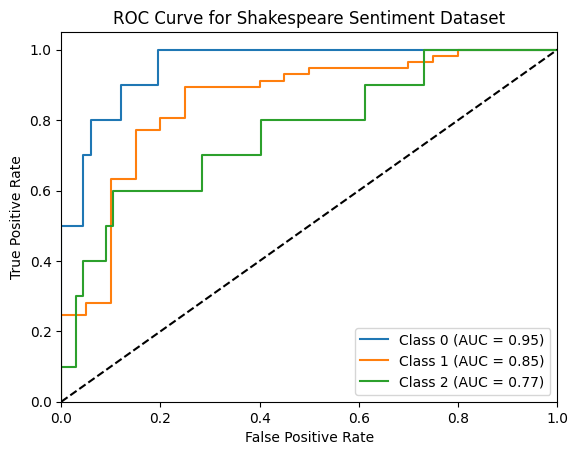

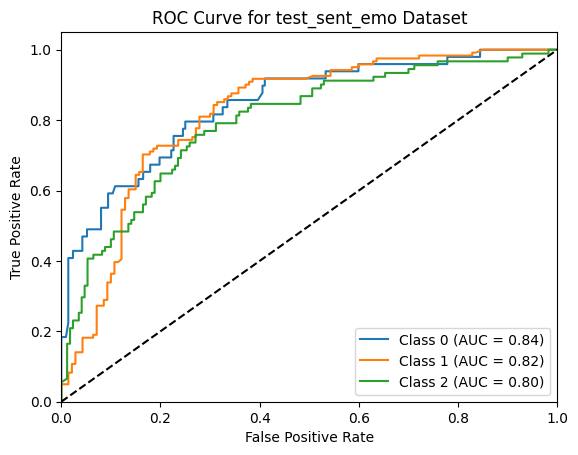

In [22]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from transformers import Trainer

# Function to calculate metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    # AUC ROC curve
    try:
        roc_auc = roc_auc_score(labels, pred.predictions, multi_class='ovr')
    except ValueError:
        roc_auc = None  # Handle the case where ROC AUC can't be calculated

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Function to plot ROC curve
def plot_roc_curve(predictions, labels, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):  # Assuming 3 classes (Positive, Neutral, Negative)
        fpr[i], tpr[i], _ = roc_curve(labels == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()

# Get predictions and labels for Shakespeare Sentiment dataset
shakespeare_pred = trainer_s.predict(test_dataset_s)
shakespeare_metrics = compute_metrics(shakespeare_pred)
print("Shakespeare Sentiment Dataset Test Evaluation Results:")
print(shakespeare_metrics)

# Get predictions and labels for test_sent_emo dataset
test_sent_emo_pred = trainer_e.predict(test_dataset_e)
test_sent_emo_metrics = compute_metrics(test_sent_emo_pred)
print("test_sent_emo Dataset Test Evaluation Results:")
print(test_sent_emo_metrics)

# Plot ROC curve for Shakespeare dataset
plot_roc_curve(shakespeare_pred.predictions, shakespeare_pred.label_ids, "Shakespeare Sentiment Dataset")

# Plot ROC curve for test_sent_emo dataset
plot_roc_curve(test_sent_emo_pred.predictions, test_sent_emo_pred.label_ids, "test_sent_emo Dataset")
